In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_13point5CS_spinup_0ka/grl40_bm5_paleo17a_CT4_BH0_13point5CS_spinup_0ka0006.nc')
ds_grl40_bm5_paleo17a_CT4_BH0_m1ka_pkp_init = xr.open_dataset('/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_13point5CS_spinup_0ka/grl40_bm5_paleo17a_CT4_BH0_13point5CS_spinup_0ka0009.nc')

H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
age_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/age_data_40kms.nc")

H_data = H_data_40["H"].data
H_uncert_data = H_data_40["H_uncert"].data
age_c_data = age_data_40["age_c"].data
age_c_uncert_data = age_data_40["age_c_uncert_real"].data

mask_H = H_data >= 0.0
mask_H = mask_H.astype(float)
mask_age_c = np.zeros(age_c_data.shape)

for kc in range(age_c_data.shape[0]):
    for j in range(age_c_data.shape[1]):
        for i in range(age_c_data.shape[2]):
            if age_c_uncert_data[kc, j, i] > 0 and age_c_data[kc, j, i] >= 0 and age_c_data[kc, j, i] <= 60000 and H_data[j, i] >= 2000.0:
                mask_age_c[kc, j, i] = 1.0

In [3]:
sicopolis_dir = '/home/shreyas/update_to_develop_sicopolis/sicopolis_tuneAll'
simulation = 'grl40_bm5_paleo17a_CT4_BH0_AC_BM5_m11ka_pkp'
dict_sico_out_folder_prefixes = {"nodiff": "N",
                                 "tlm": "FORWARD",
                                 "adj": "ADJOINT",
                                 "tlm_action": "FORWARDHESSACTION",
                                 "adj_action": "ADJHESSACTION"}
dict_ad_exec_cmds_suffixes = {"nodiff": "nodiff",
                              "tlm": "forward",
                              "adj": "adjoint",
                              "tlm_action": "forwardhessaction",
                              "adj_action": "adjointhessaction"}
dict_ad_log_file_suffixes = {"nodiff": "nodiff",
                             "tlm": "tlm",
                             "adj": "adj",
                             "tlm_action": "tlm_hessaction",
                             "adj_action": "adj_hessaction"}
dict_ad_nc_suffixes = {"nodiff": "nodiff",
                       "tlm": "tlm",
                       "adj": "adj",
                       "tlm_action": "tlm_hessaction",
                       "adj_action": "adj_hessaction"}

KCMAX = 80
exp_sigma_level = dataCleaner.exp_sigma_level(zeta = np.arange(0,1+1./KCMAX,1./KCMAX),
                                              exponent = 2.0)
xModel40       = np.arange(-72.,97.,4.0)*10
yModel40       = np.arange(-345.,-56.,4.0)*10
time_ad = np.arange(12, dtype=float)
IMAX = xModel40.shape[0]-1
JMAX = yModel40.shape[0]-1

data = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init['q_geo'].data
log_q_geo = np.where(data > 0, np.log10(data), -5)
data = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init['H'].data
log_H = np.where(data > 0, np.log10(data), -5)
zs = np.zeros((JMAX+1, IMAX+1), dtype=float)
zl = np.zeros((JMAX+1, IMAX+1), dtype=float)
zl0 = np.zeros((JMAX+1, IMAX+1), dtype=float)
zb = np.zeros((JMAX+1, IMAX+1), dtype=float)

log_c_dis_da = np.log10(15659.0)
log_c_slide_init = np.log10(13.5)*np.ones((JMAX+1, IMAX+1))
log_gamma_s = np.log10(0.070458)*np.ones((JMAX+1, IMAX+1))
log_s_stat = np.log10(5.0)
log_beta1 = np.log10(2.73)
log_beta2 = np.log10(7.28)
log_Pmax = np.log10(0.6)
log_mu = np.log10(9.7155)
log_RHO_A = np.log10(3300.0)
log_time_lag_asth = np.log10(3000.0)

temp_c = np.zeros((KCMAX+1, JMAX+1, IMAX+1), dtype=float)
data = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_init['age_c'].data
log_age_c = np.where(data > 0, np.log10(data), -5)

dict_og_params_fields_vals = {"xx_c_slide_init": log_c_slide_init,
                    "xx_c_dis_da": log_c_dis_da,
                    "xx_q_geo": log_q_geo,
                    "xx_H": log_H,
                    "xx_gamma_s": log_gamma_s,
                    "xx_s_stat": log_s_stat,
                    "xx_beta1": log_beta1,
                    "xx_beta2": log_beta2,
                    "xx_Pmax": log_Pmax,
                    "xx_mu": log_mu,
                    "xx_RHO_A": log_RHO_A,
                    "xx_time_lag_asth": log_time_lag_asth,
                    "xx_zs": zs,
                    "xx_zl": zl,
                    "xx_zl0": zl0,
                    "xx_zb": zb,
                    "xx_temp_c": temp_c,
                    "xx_age_c": log_age_c}

dict_params_fields_num_dims = {"xx_c_slide_init": "2D",
                        "xx_c_dis_da": "2D",
                        "xx_q_geo": "2D",
                        "xx_H": "2D",
                        "xx_gamma_s": "2D",
                        "xx_s_stat": "2D",
                        "xx_beta1": "2D",
                        "xx_beta2": "2D",
                        "xx_Pmax": "2D",
                        "xx_mu": "2D",
                        "xx_RHO_A": "2D",
                        "xx_time_lag_asth": "2D",
                        "xx_zs": "2D",
                        "xx_zl": "2D",
                        "xx_zl0": "2D",
                        "xx_zb": "2D",
                        "xx_temp_c": "3D",
                        "xx_age_c": "3D"}

dict_params_coords = {"time_ad": time_ad,
               "zeta_c": exp_sigma_level,
               "y": yModel40,
               "x": xModel40}

dict_params_attrs_type = {"xx_c_slide_init": "nodiff",
                   "xx_c_dis_da": "nodiff",
                   "xx_q_geo": "nodiff",
                   "xx_H": "nodiff",
                   "xx_gamma_s": "nodiff",
                   "xx_s_stat": "nodiff",
                   "xx_beta1": "nodiff",
                   "xx_beta2": "nodiff",
                   "xx_Pmax": "nodiff",
                   "xx_mu": "nodiff",
                   "xx_RHO_A": "nodiff",
                   "xx_time_lag_asth": "nodiff",
                   "xx_zs": "nodiff",
                   "xx_zl": "nodiff",
                   "xx_zl0": "nodiff",
                   "xx_zb": "nodiff",
                   "xx_temp_c": "nodiff",
                   "xx_age_c": "nodiff"}

dict_params_fields_or_scalars = {"xx_c_slide_init": "field",
                          "xx_c_dis_da": "scalar",
                          "xx_q_geo": "field",
                          "xx_H": "field",
                          "xx_gamma_s": "field",
                          "xx_s_stat": "scalar",
                          "xx_beta1": "scalar",
                          "xx_beta2": "scalar",
                          "xx_Pmax": "scalar",
                          "xx_mu": "scalar",
                          "xx_RHO_A": "scalar",
                          "xx_time_lag_asth": "scalar",
                          "xx_zs": "field",
                          "xx_zl": "field",
                          "xx_zl0": "field",
                          "xx_zb": "field",
                          "xx_temp_c": "field",
                          "xx_age_c": "field"}

year2sec = 3.1556925445e+07
# dict_masks_observables = {"H": mask_H*H_uncert_data**(-2)}
dict_masks_observables = {"H": mask_H*H_uncert_data**(-2), "age_c": mask_age_c*(age_c_uncert_data*year2sec)**(-2)}

dict_prior_sigmas = {"xx_c_slide_init": 1.0,
                          "xx_c_dis_da": 3.0,
                          "xx_q_geo": 1.0,
                          "xx_H": 2.0,
                          "xx_gamma_s": 1.0,
                          "xx_s_stat": 1.0,
                          "xx_beta1": 1.0,
                          "xx_beta2": 1.0,
                          "xx_Pmax": 1.0,
                          "xx_mu": 1.0,
                          "xx_RHO_A": 3.0,
                          "xx_time_lag_asth": 3.0,
                          "xx_zs": 1000.0,
                          "xx_zl": 1000.0,
                          "xx_zl0": 1000.0,
                          "xx_zb": 1000.0,
                          "xx_temp_c": 10.0,
                          "xx_age_c": 3.0}

dict_prior_gammas = {"xx_c_slide_init": 0.0,
                          "xx_c_dis_da": 0.0,
                          "xx_q_geo": 1.0,
                          "xx_H": 1.0,
                          "xx_gamma_s": 1.0,
                          "xx_s_stat": 0.0,
                          "xx_beta1": 0.0,
                          "xx_beta2": 0.0,
                          "xx_Pmax": 0.0,
                          "xx_mu": 0.0,
                          "xx_RHO_A": 0.0,
                          "xx_time_lag_asth": 0.0,
                          "xx_zs": 0.0,
                          "xx_zl": 0.0,
                          "xx_zl0": 1.0,
                          "xx_zb": 1.0,
                          "xx_temp_c": 1.0,
                          "xx_age_c": 1.0}

dict_prior_deltas = {"xx_c_slide_init": 0.0,
                          "xx_c_dis_da": 0.1,
                          "xx_q_geo": 0.1,
                          "xx_H": 0.1,
                          "xx_gamma_s": 0.1,
                          "xx_s_stat": 0.1,
                          "xx_beta1": 0.1,
                          "xx_beta2": 0.1,
                          "xx_Pmax": 0.1,
                          "xx_mu": 0.1,
                          "xx_RHO_A": 0.1,
                          "xx_time_lag_asth": 0.1,
                          "xx_zs": 0.0,
                          "xx_zl": 0.0,
                          "xx_zl0": 0.1,
                          "xx_zb": 0.1,
                          "xx_temp_c": 0.1,
                          "xx_age_c": 0.1}

list_fields_to_ignore = ["xx_c_slide_init", "xx_zs", "xx_zl"]

# all_fields = ["xx_c_slide_init", "xx_q_geo", "xx_H", "xx_gamma_s", 
#               "xx_s_stat", "xx_beta1", "xx_beta2", "xx_Pmax", "xx_mu", "xx_c_dis_da", "xx_RHO_A", "xx_time_lag_asth", 
#               "xx_zs", "xx_zl", "xx_zl0", "xx_zb",
#               "xx_temp_c", "xx_age_c"]

MAX_ITERS_SOR = 100
OMEGA_SOR = 1.5

/tmp/ipykernel_1310925/2754446028.py:36: RuntimeWarning: divide by zero encountered in log10
  log_H = np.where(data > 0, np.log10(data), -5)
/tmp/ipykernel_1310925/2754446028.py:55: RuntimeWarning: divide by zero encountered in log10
  log_age_c = np.where(data > 0, np.log10(data), -5)


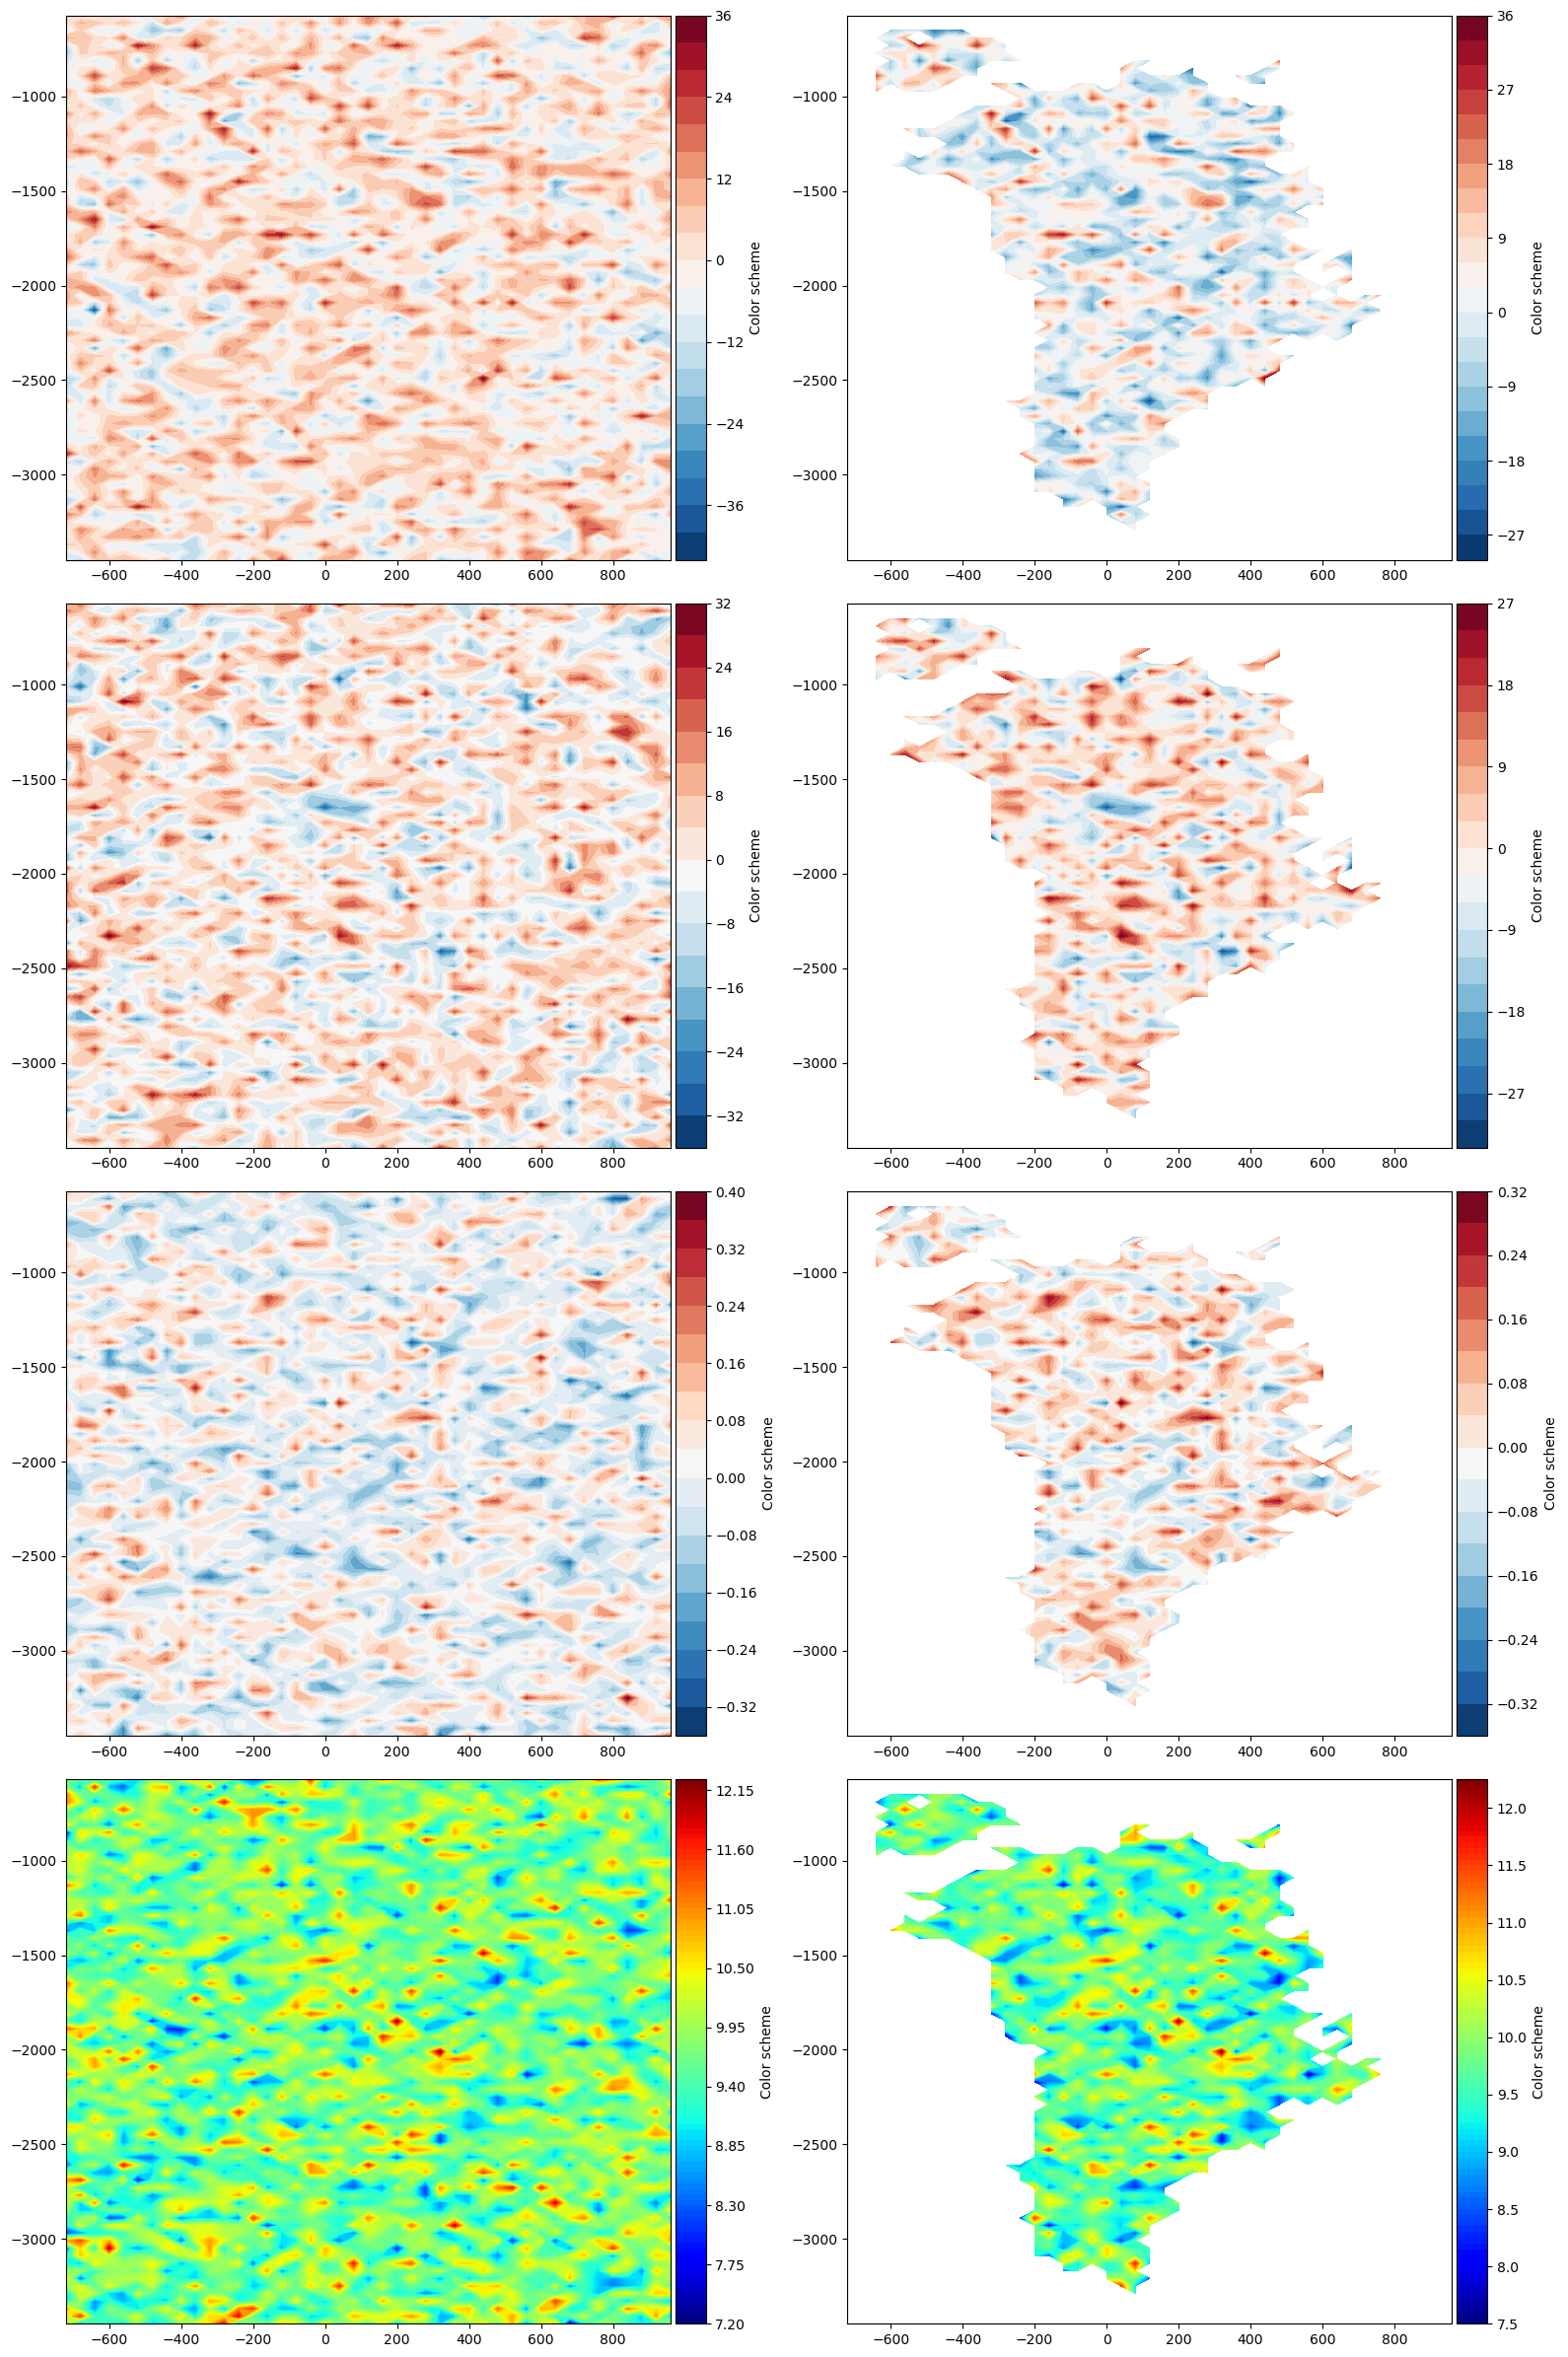

In [18]:
DA = optim.DataAssimilation(sicopolis_dir, simulation,
                            dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                            dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                            dict_og_params_fields_vals, dict_params_fields_num_dims, 
                            dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
                            dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                            MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll", 100, None)

ds_prior_X = DA.ds_prior_X.copy()

ds_subset_sample_prior_C_1 = DA.sample_prior_C()
ds_subset_sample_prior_C_2 = DA.sample_prior_C()
ds_mean_samples_prior_C, ds_std_samples_prior_C = DA.ds_prior_C_mean, DA.ds_prior_C_std

ds_subset_sample_prior_1 = DA.sample_prior()
ds_subset_sample_prior_2 = DA.sample_prior()
ds_mean_samples_prior, ds_std_samples_prior = DA.pointwise_marginals("prior", 100)

H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
H_data = H_data_40["H"].data
mask = 1.0*(H_data > 0)
mask[mask == 0] = np.nan

plt.rcParams["figure.figsize"] = (16,24)
fig, ax = plt.subplots(4, 2)
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_C_1["xx_q_geod"].data,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_C_1["xx_q_geod"].data*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_C_2["xx_q_geod"].data,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_C_2["xx_q_geod"].data*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_mean_samples_prior_C["xx_q_geod"].data/ds_std_samples_prior_C["xx_q_geod"].data,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[2, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_mean_samples_prior_C["xx_q_geod"].data/ds_std_samples_prior_C["xx_q_geod"].data*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[2, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_std_samples_prior_C["xx_q_geod"].data,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[3, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_std_samples_prior_C["xx_q_geod"].data*mask,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[3, 1])
plt.tight_layout()

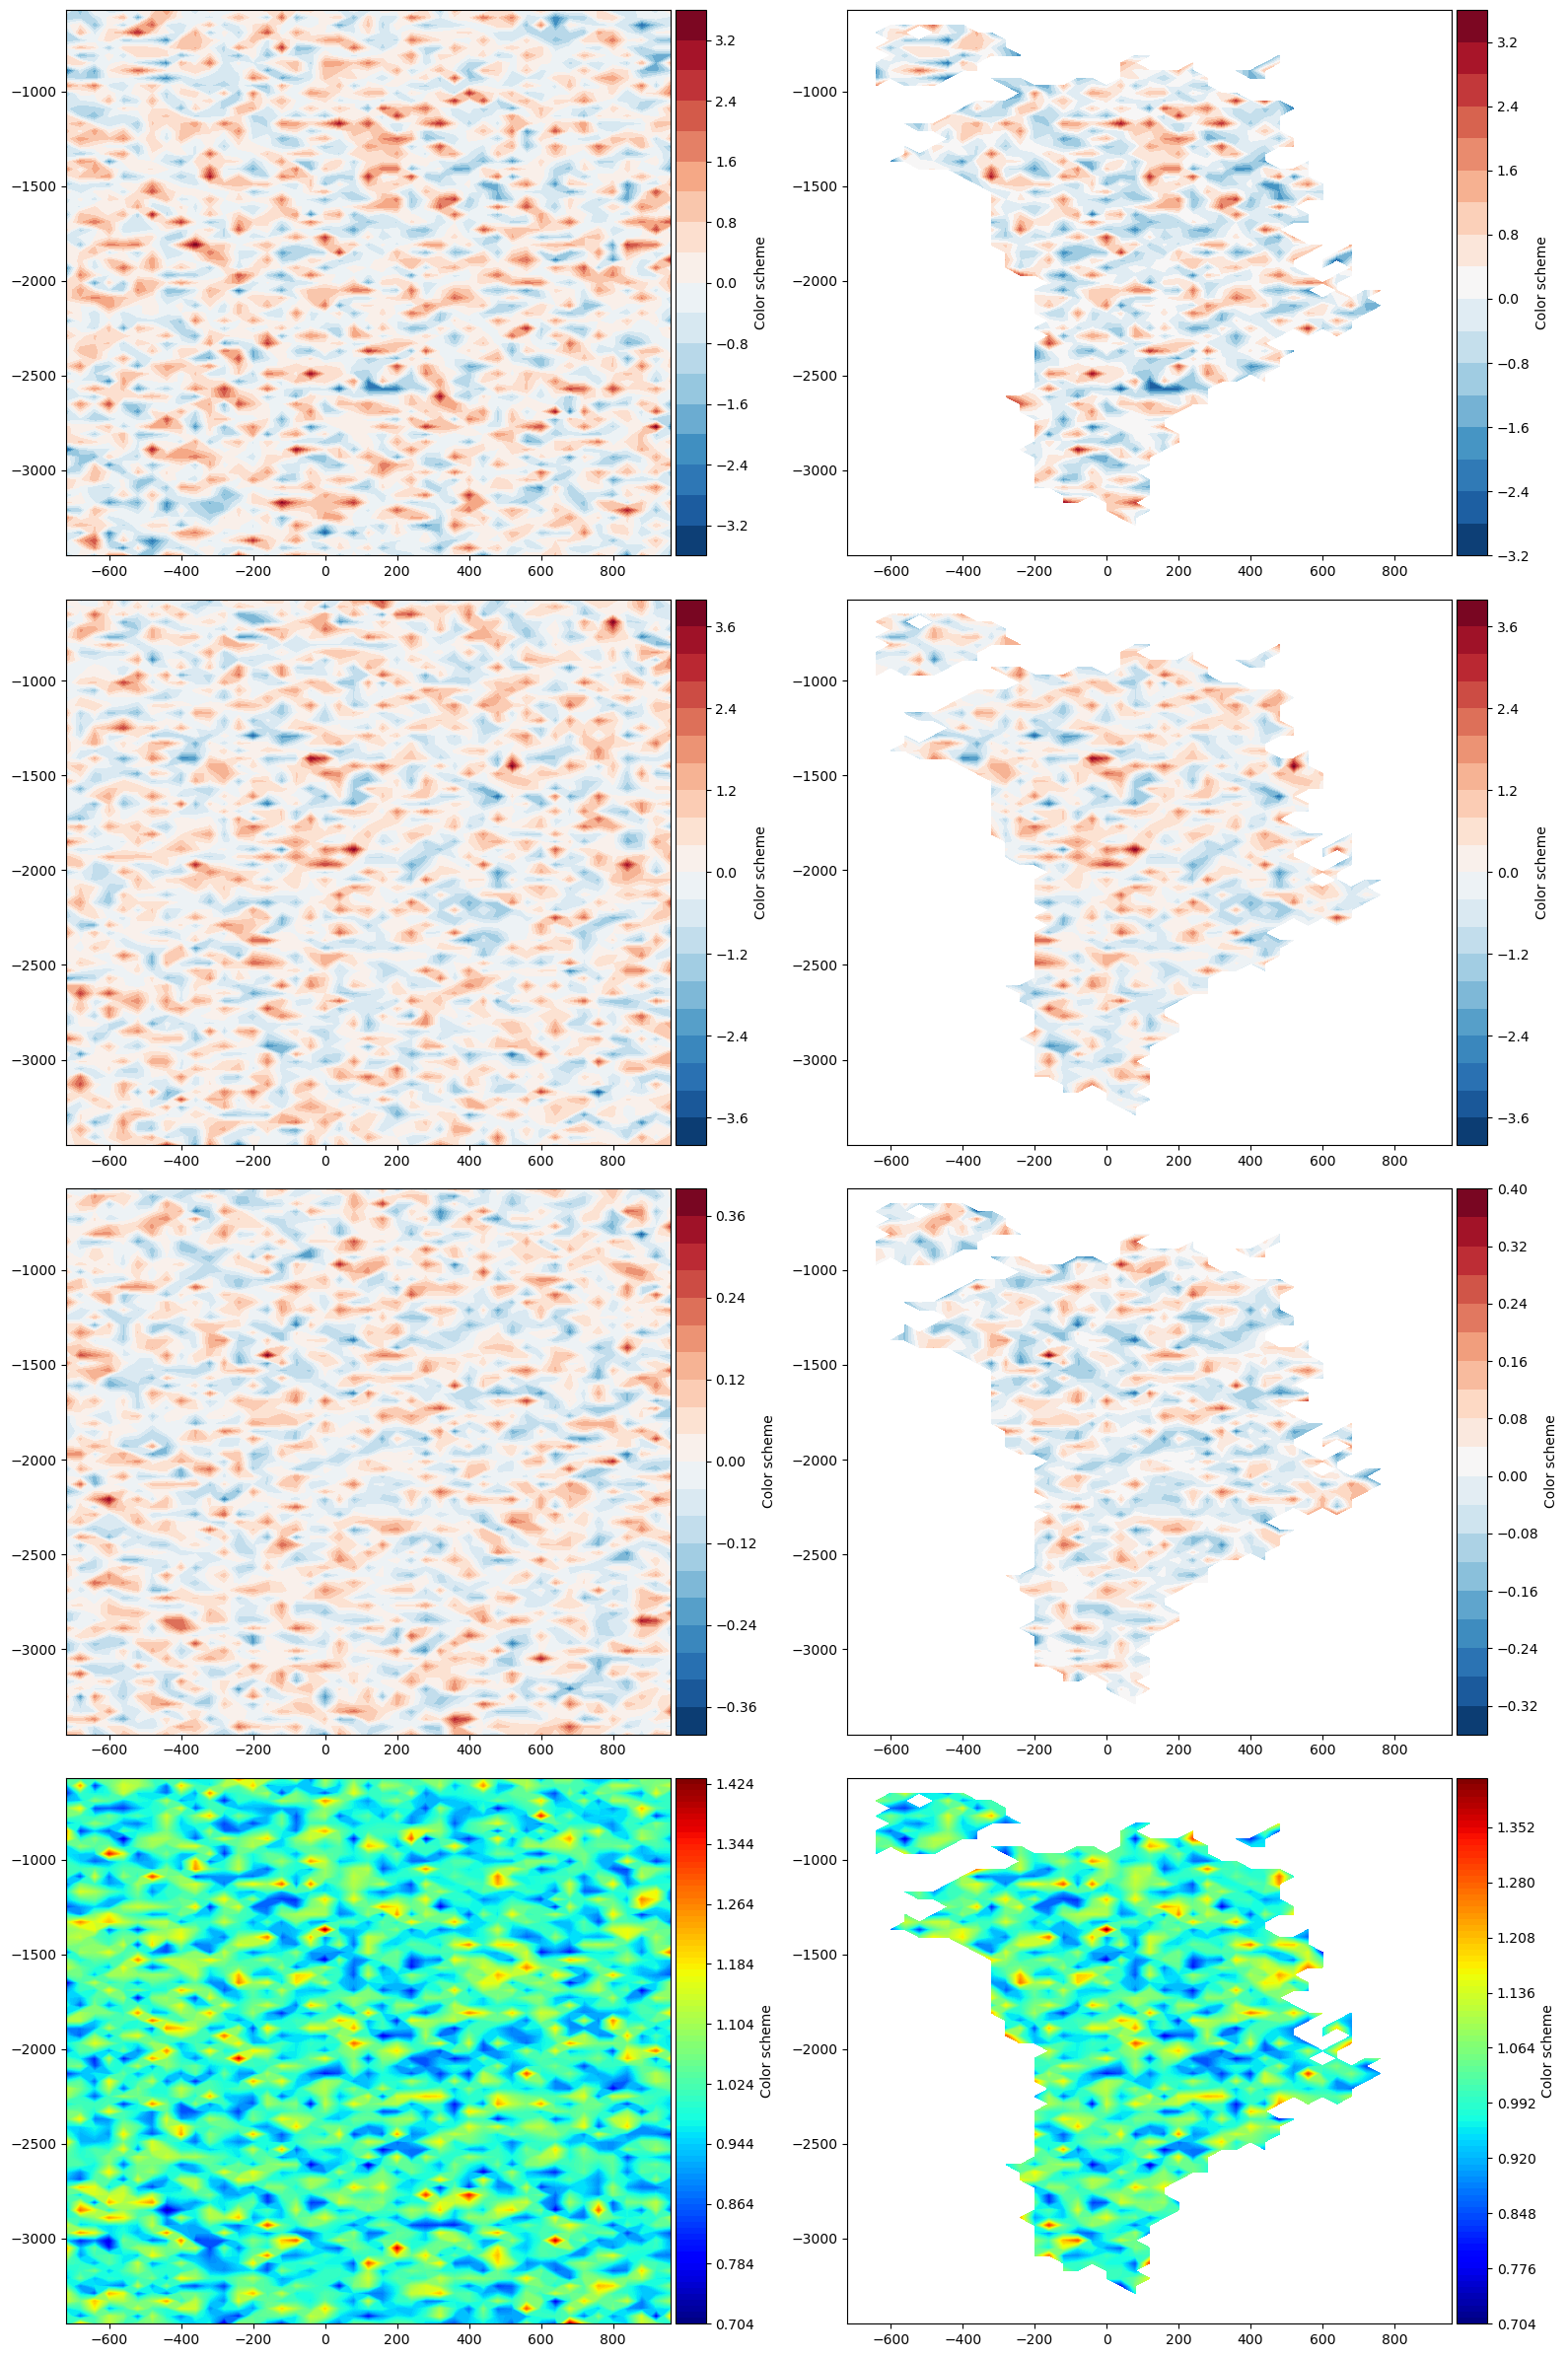

In [19]:
H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
H_data = H_data_40["H"].data
mask = 1.0*(H_data > 0)
mask[mask == 0] = np.nan

plt.rcParams["figure.figsize"] = (16,24)
fig, ax = plt.subplots(4, 2)
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_1["xx_q_geod"].data,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_1["xx_q_geod"].data*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_2["xx_q_geod"].data,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_2["xx_q_geod"].data*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_mean_samples_prior["xx_q_geod"].data/ds_std_samples_prior["xx_q_geod"].data,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[2, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_mean_samples_prior["xx_q_geod"].data/ds_std_samples_prior["xx_q_geod"].data*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[2, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_std_samples_prior["xx_q_geod"].data,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[3, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_std_samples_prior["xx_q_geod"].data*mask,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[3, 1])
plt.tight_layout()

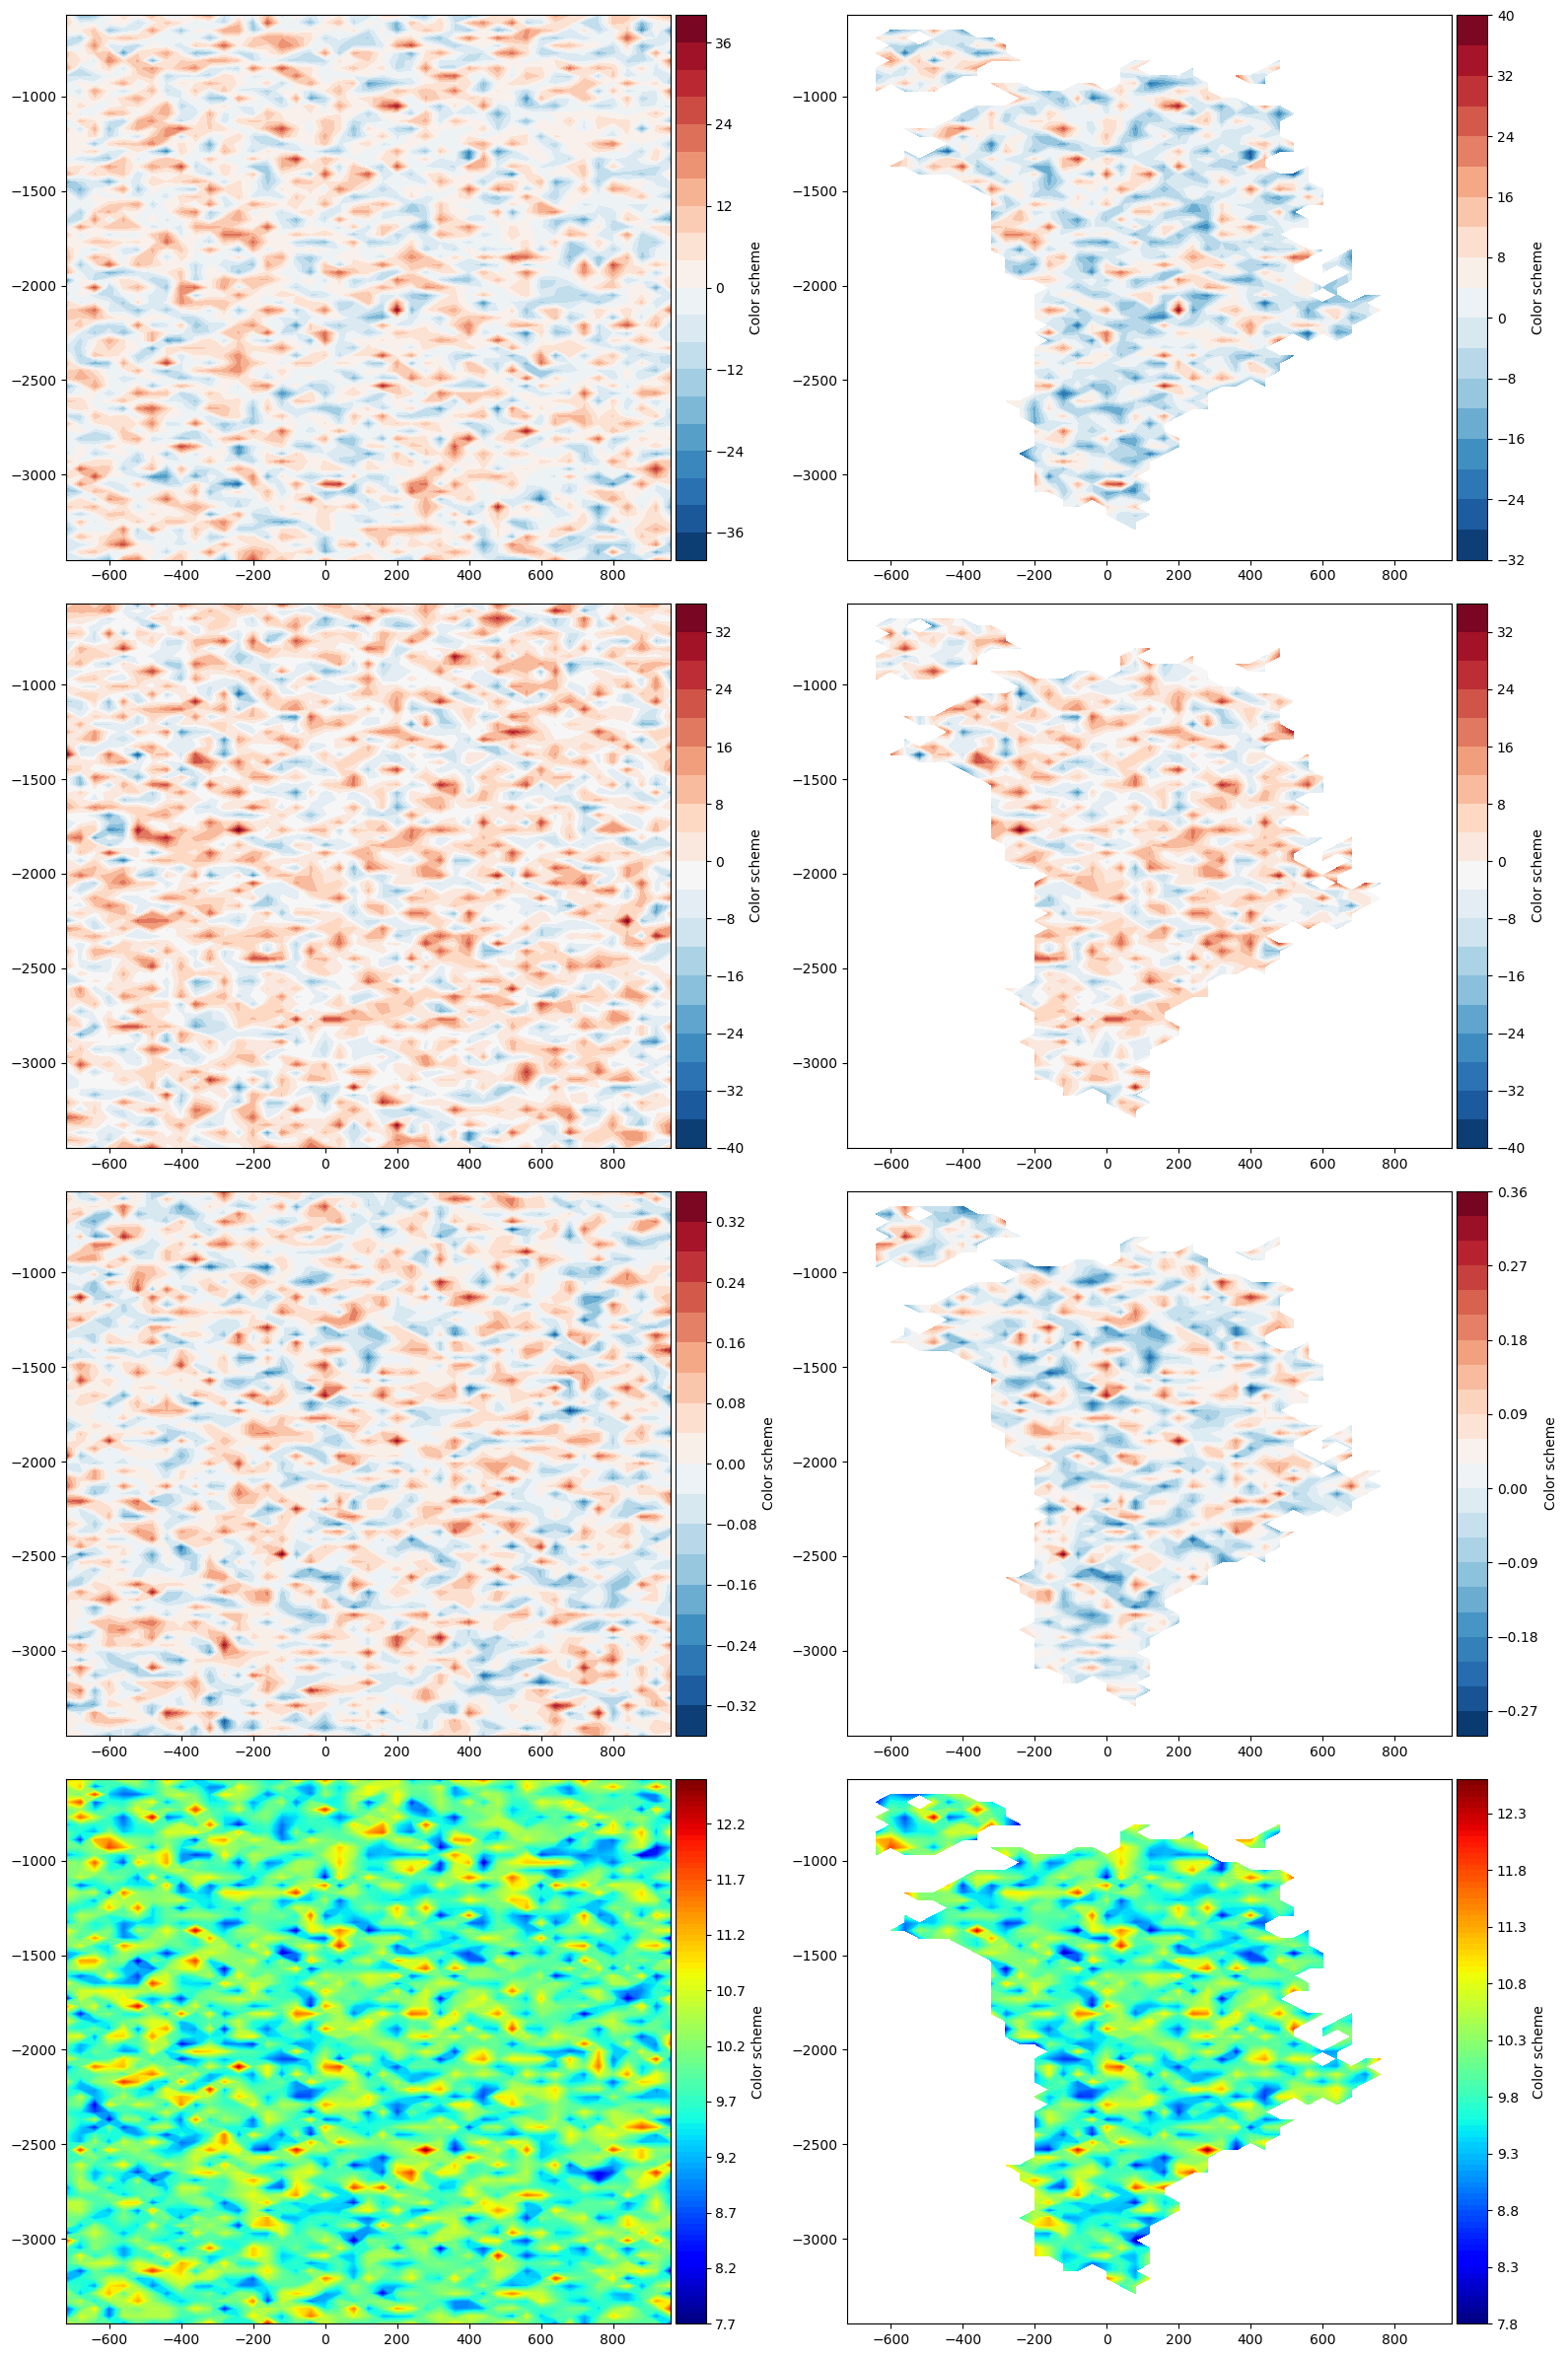

In [20]:
H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
H_data = H_data_40["H"].data
mask = 1.0*(H_data > 0)
mask[mask == 0] = np.nan

plt.rcParams["figure.figsize"] = (16,24)
fig, ax = plt.subplots(4, 2)
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_C_1["xx_age_cd"].data[40],
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_C_1["xx_age_cd"].data[40]*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_C_2["xx_age_cd"].data[40],
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_C_2["xx_age_cd"].data[40]*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_mean_samples_prior_C["xx_age_cd"].data[40]/ds_std_samples_prior_C["xx_age_cd"].data[40],
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[2, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_mean_samples_prior_C["xx_age_cd"].data[40]/ds_std_samples_prior_C["xx_age_cd"].data[40]*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[2, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_std_samples_prior_C["xx_age_cd"].data[40],
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[3, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_std_samples_prior_C["xx_age_cd"].data[40]*mask,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[3, 1])
plt.tight_layout()

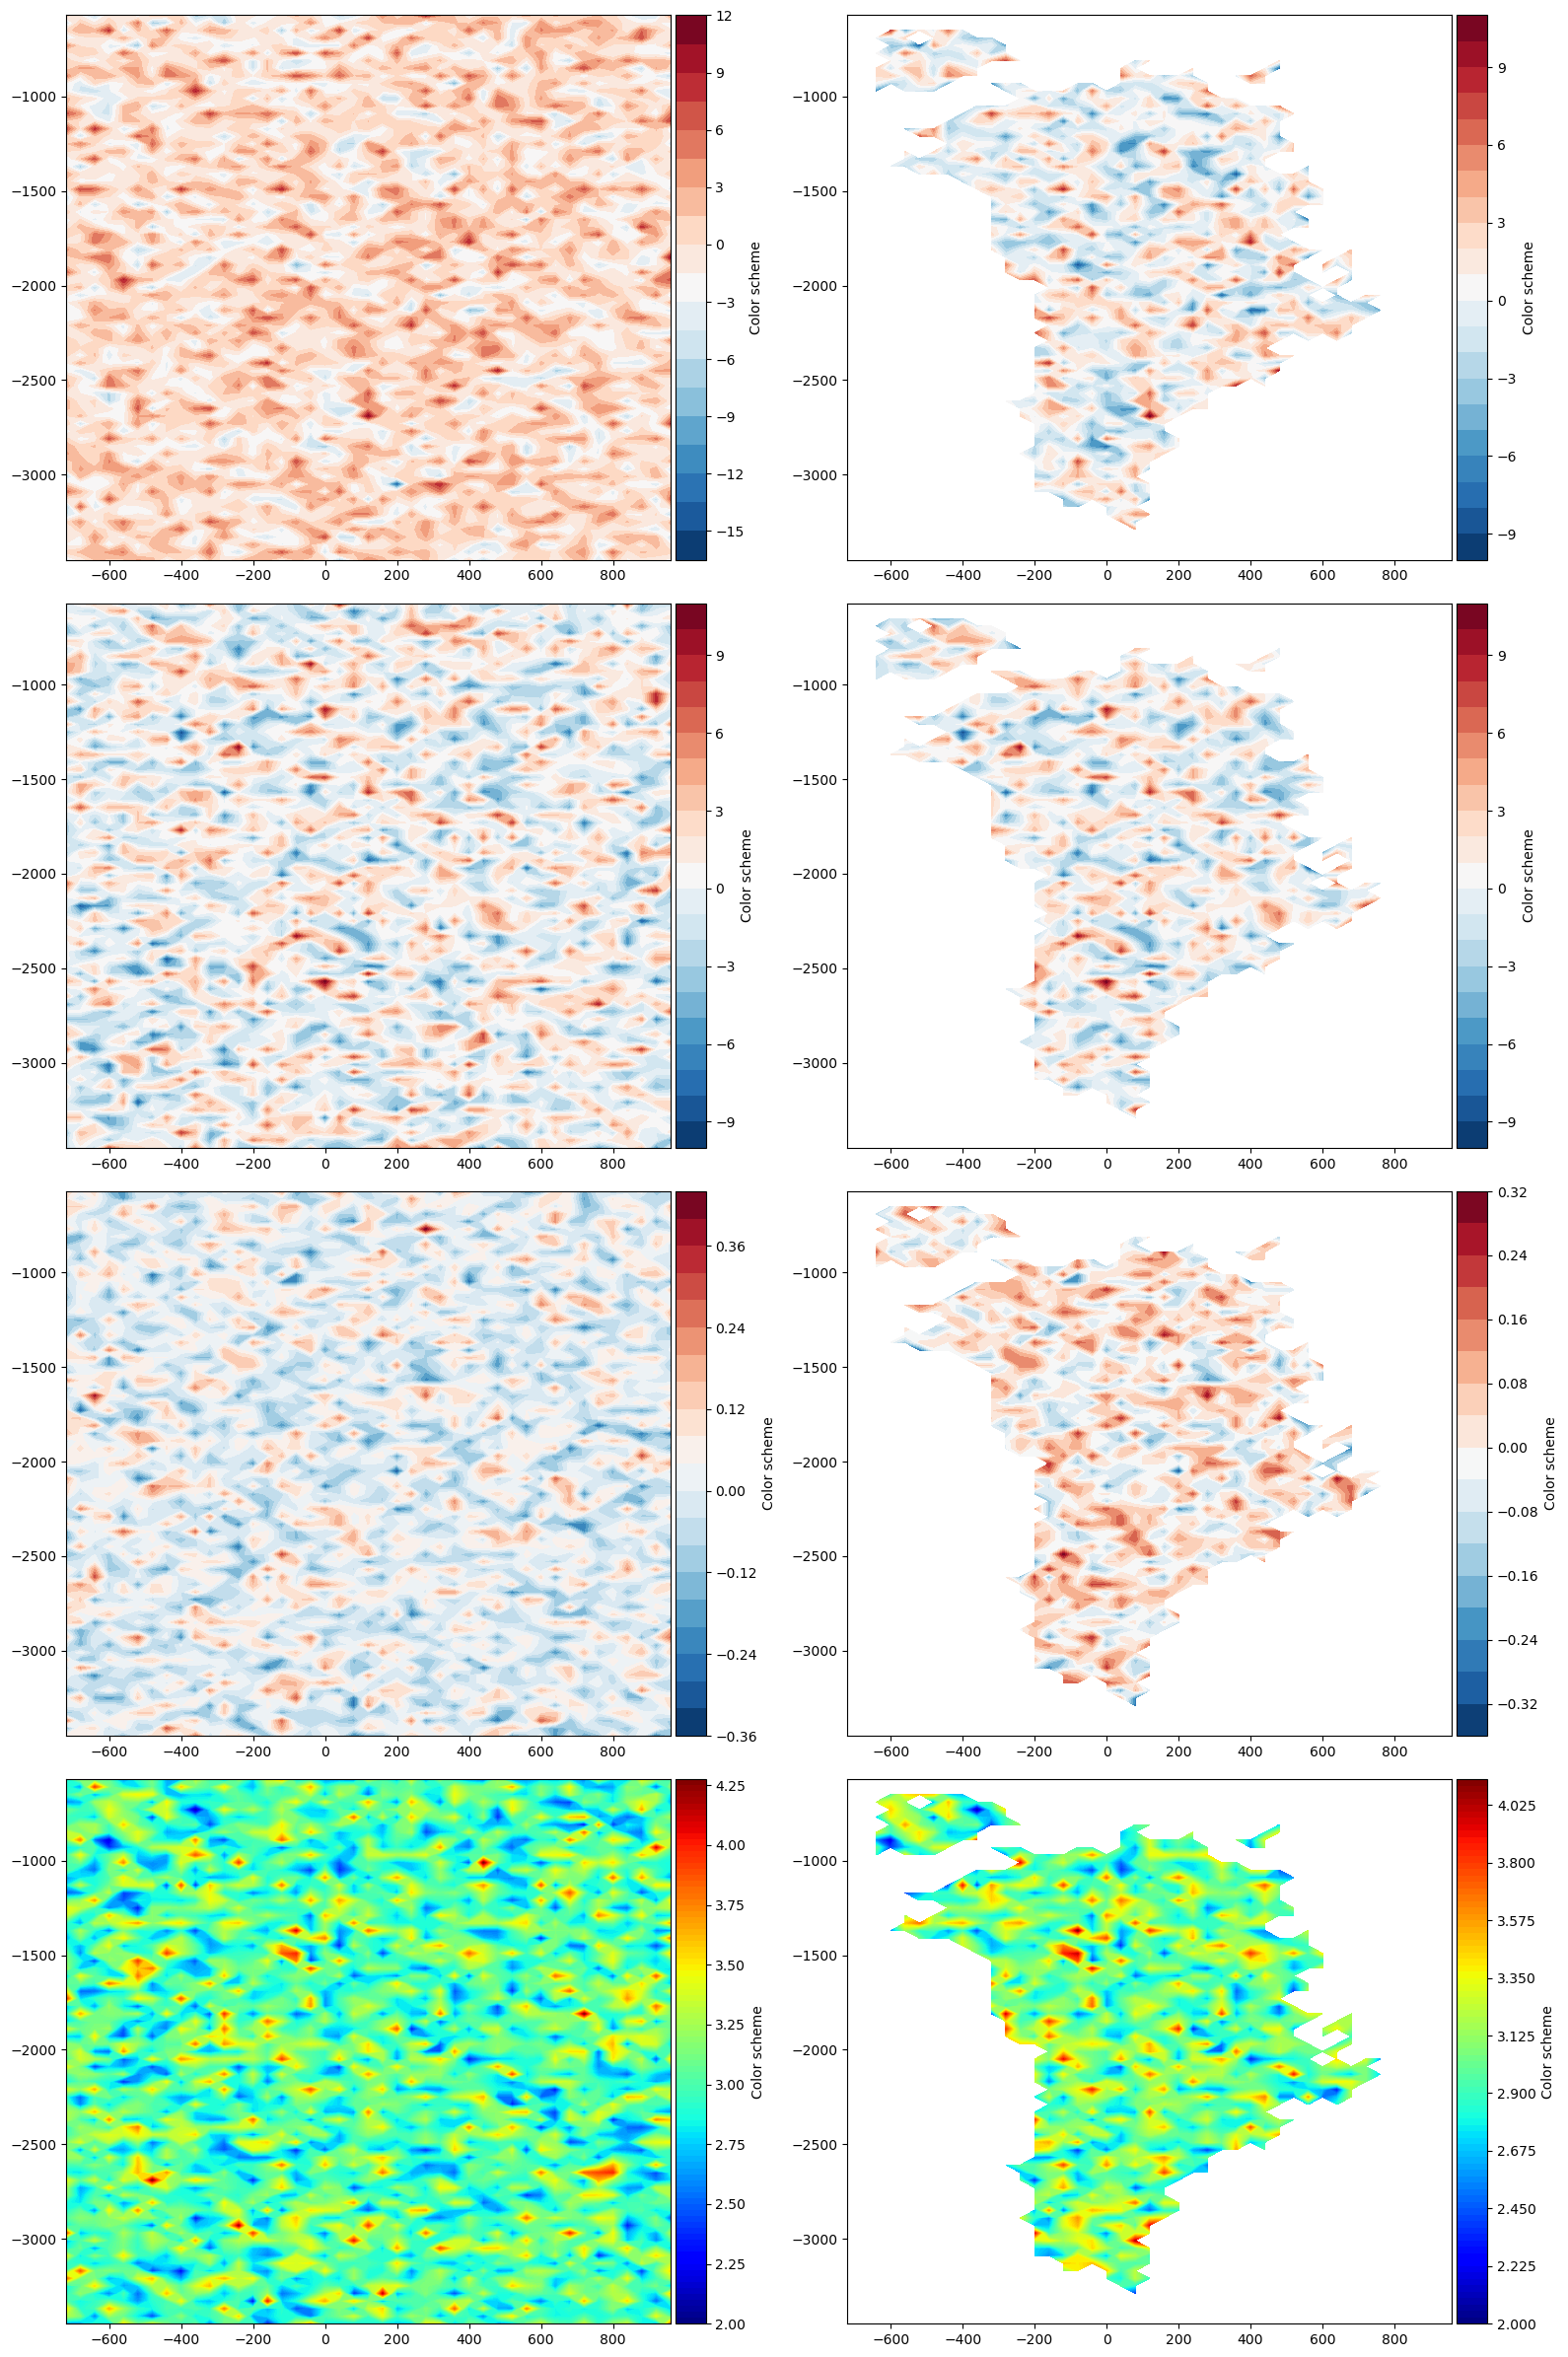

In [21]:
H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
H_data = H_data_40["H"].data
mask = 1.0*(H_data > 0)
mask[mask == 0] = np.nan

plt.rcParams["figure.figsize"] = (16,24)
fig, ax = plt.subplots(4, 2)
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_1["xx_age_cd"].data[40],
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_1["xx_age_cd"].data[40]*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_2["xx_age_cd"].data[40],
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_subset_sample_prior_2["xx_age_cd"].data[40]*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_mean_samples_prior["xx_age_cd"].data[40]/ds_std_samples_prior["xx_age_cd"].data[40],
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[2, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_mean_samples_prior["xx_age_cd"].data[40]/ds_std_samples_prior["xx_age_cd"].data[40]*mask,
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[2, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_std_samples_prior["xx_age_cd"].data[40],
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[3, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_std_samples_prior["xx_age_cd"].data[40]*mask,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[3, 1])
plt.tight_layout()

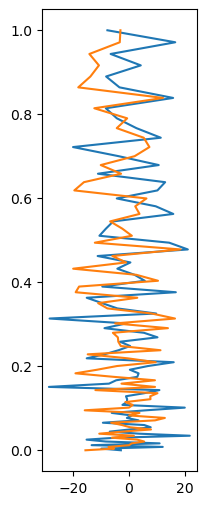

In [22]:
plt.rcParams["figure.figsize"] = (2, 6)
plt.plot(ds_subset_sample_prior_C_1["xx_age_cd"].data[:, 35, 20], exp_sigma_level)
plt.plot(ds_subset_sample_prior_C_2["xx_age_cd"].data[:, 35, 20], exp_sigma_level)
# plt.gca().invert_yaxis()  # Optional: Invert y-axis if needed

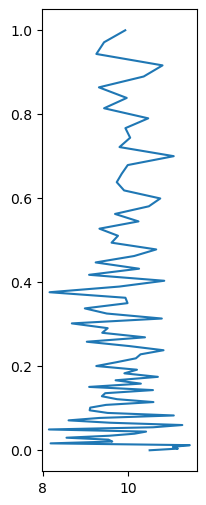

In [23]:
plt.rcParams["figure.figsize"] = (2, 6)
plt.plot(ds_std_samples_prior_C["xx_age_cd"].data[:, 35, 20], exp_sigma_level)
# plt.gca().invert_yaxis()  # Optional: Invert y-axis if needed

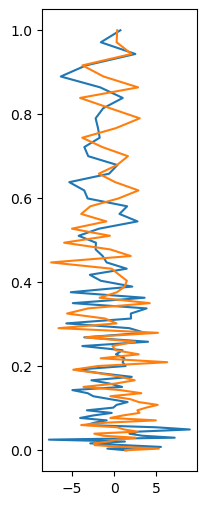

In [24]:
plt.rcParams["figure.figsize"] = (2, 6)
plt.plot(ds_subset_sample_prior_1["xx_age_cd"].data[:, 35, 20], exp_sigma_level)
plt.plot(ds_subset_sample_prior_2["xx_age_cd"].data[:, 35, 20], exp_sigma_level)
# plt.gca().invert_yaxis()  # Optional: Invert y-axis if needed

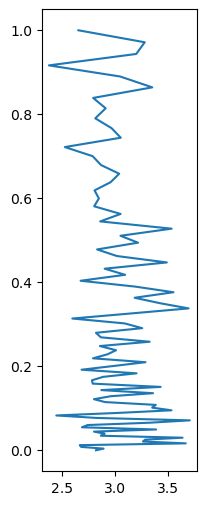

In [25]:
plt.rcParams["figure.figsize"] = (2, 6)
plt.plot(ds_std_samples_prior["xx_age_cd"].data[:, 35, 20], exp_sigma_level)
# plt.gca().invert_yaxis()  # Optional: Invert y-axis if needed

In [5]:
ds_x = DA.create_ad_tlm_action_input_nc(bool_randomize = True)
    
ds_Ax = DA.eval_tlm_action()
ds_noise_cov_inv_Ax = DA.eval_noise_cov_inv_action(ds_Ax)
ds_H_misfit_x = DA.eval_misfit_hessian_action()

DA.l2_inner_product([ds_x, ds_H_misfit_x], ["tlm", "adj"]), DA.l2_inner_product([ds_Ax, ds_noise_cov_inv_Ax], ["tlmhessaction", "adjhessaction"])

(327476799.6444633, 327476799.6444633)

In [6]:
dict_tlm_action_only_fields_vals = {}
for var in ds_x:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
    
ds_Ax = DA.eval_tlm_action()
ds_noise_cov_inv_Ax = DA.eval_noise_cov_inv_action(ds_Ax)
ds_H_misfit_x = DA.eval_misfit_hessian_action()

DA.l2_inner_product([ds_x, ds_H_misfit_x], ["tlm", "adj"]), DA.l2_inner_product([ds_Ax, ds_noise_cov_inv_Ax], ["tlmhessaction", "adjhessaction"])

(327476799.6444633, 327476799.6444633)

In [7]:
dict_tlm_action_only_fields_vals = {}
for var in ds_x:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
    
ds_Ax = DA.eval_tlm_action()
ds_noise_cov_inv_Ax = DA.eval_noise_cov_inv_action(ds_Ax)
ds_H_misfit_x = DA.eval_misfit_hessian_action()

ds_SigmaXCx = DA.eval_sqrt_prior_cov_action(ad_key_adj_or_tlm_action = "tlm_action")
ds_A_SigmaXCx = DA.eval_tlm_action()
ds_noise_cov_inv_A_SigmaXCx = DA.eval_noise_cov_inv_action(ds_A_SigmaXCx)

dict_tlm_action_only_fields_vals = {}
for var in ds_x:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)

ds_CT_XT_SigmaT_H_misfit_SigmaXCx = DA.eval_prior_preconditioned_misfit_hessian_action()

DA.l2_inner_product([ds_x, ds_CT_XT_SigmaT_H_misfit_SigmaXCx], ["tlm", "adj"]), DA.l2_inner_product([ds_A_SigmaXCx, ds_noise_cov_inv_A_SigmaXCx], ["tlmhessaction", "adjhessaction"])

(2921453943.1739573, 2921453943.1725287)

In [8]:
dict_tlm_action_only_fields_vals = {}
for var in ds_x:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
ds_SigmaXCx = DA.eval_sqrt_prior_cov_action(ad_key_adj_or_tlm_action = "tlm_action")
ds_SigmaXC_inv_SigmaXCx = DA.eval_sqrt_prior_cov_inv_action()

DA.l2_inner_product([ds_SigmaXC_inv_SigmaXCx, ds_SigmaXC_inv_SigmaXCx], ["tlm", "tlm"]), DA.l2_inner_product([ds_x, ds_x], ["tlm", "tlm"])

(525298.0164307337, 525298.0164307337)

In [9]:
DA.l2_inner_product([ds_SigmaXCx, ds_SigmaXCx], ["tlm", "tlm"]), DA.l2_inner_product([ds_x, ds_x], ["tlm", "tlm"])

(6592542225.19197, 525298.0164307337)

In [10]:
dict_tlm_action_only_fields_vals = {}
for var in ds_x:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data.copy()

ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
ds_SigmaXCx = DA.eval_sqrt_prior_cov_action(ad_key_adj_or_tlm_action = "tlm_action")

ds_SigmaXCx_as_adj_fields = xr.open_dataset(DA.dict_ad_inp_nc_files["tlm_action"])
ds_SigmaXCx_as_adj_fields = ds_SigmaXCx_as_adj_fields.rename({field + "d": field + "b" for field in dict_og_params_fields_vals})
for var in ds_SigmaXCx_as_adj_fields:
    if ds_SigmaXCx_as_adj_fields[var].attrs["type"] == "tlm":
        ds_SigmaXCx_as_adj_fields[var].attrs["type"] = "adj"
        if dict_params_fields_or_scalars[var[:-1]] == "scalar" and dict_params_fields_num_dims[var[:-1]] == "2D":
            ds_SigmaXCx_as_adj_fields[var].data[:, :] = ds_SigmaXCx_as_adj_fields[var].data.flat[0]/((IMAX+1)*(JMAX+1))
        elif dict_params_fields_or_scalars[var[:-1]] == "scalar" and dict_params_fields_num_dims[var[:-1]] == "3D":
            ds_SigmaXCx_as_adj_fields[var].data[:, :] = ds_SigmaXCx_as_adj_fields[var].data.flat[0]/((IMAX+1)*(JMAX+1)*(KCMAX+1))
ds_SigmaXCx_as_adj_fields.to_netcdf(DA.dict_ad_out_nc_files["adj_action"])

ds_CT_XT_SigmaT_SigmaXCx = DA.eval_sqrt_prior_covT_action(ad_key_adj_or_adj_action = "adj_action")

DA.l2_inner_product([ds_SigmaXCx, ds_SigmaXCx], ["tlm", "tlm"]), DA.l2_inner_product([ds_x, ds_CT_XT_SigmaT_SigmaXCx], ["tlm", "adj"])

(6592542225.19197, 6592542225.191928)

In [11]:
dict_tlm_action_only_fields_vals = {}
for var in ds_x:
    if DA.dict_tlm_action_fields_or_scalars[var] == "scalar":
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data[0].copy()
    else:
        dict_tlm_action_only_fields_vals[var] = ds_x[var].data.copy()
ds_x = DA.create_ad_tlm_action_input_nc(dict_tlm_action_only_fields_vals)
ds_CT_XT_SigmaT_H_SigmaXCx = DA.eval_prior_preconditioned_hessian_action()

DA.l2_inner_product([ds_x, ds_CT_XT_SigmaT_H_misfit_SigmaXCx], ["tlm", "adj"]), \
DA.l2_inner_product([ds_x, ds_CT_XT_SigmaT_H_misfit_SigmaXCx], ["tlm", "adj"]) + DA.l2_inner_product([ds_x, ds_x], ["tlm", "tlm"]), \
DA.l2_inner_product([ds_x, ds_CT_XT_SigmaT_H_SigmaXCx], ["tlm", "adj"])

(2921453943.1739573, 2921979241.190388, 2921979241.1903872)

In [12]:
DA = optim.DataAssimilation(sicopolis_dir, simulation,
                            dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                            dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                            dict_og_params_fields_vals, dict_params_fields_num_dims, 
                            dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
                            dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                            MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll", None, ds_prior_X)

DA.gradient_descent(1)

---------------------------------------------------------------------------------------------------------------
iter 0, fc = 14025369.09971311, fc_data = 14025369.09971311, fc_reg = 0.0
---------------------------------------------------------------------------------------------------------------
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Too big step size probably crashed the simulation.
Step size alpha = 0.000244140625
---------------------------------------------------------

<xarray.Dataset> Size: 4MB
Dimensions:           (y: 73, x: 43, scalar: 1, zeta_c: 81)
Coordinates:
  * y                 (y) float64 584B -3.45e+03 -3.41e+03 ... -610.0 -570.0
  * x                 (x) float64 344B -720.0 -680.0 -640.0 ... 920.0 960.0
  * zeta_c            (zeta_c) float64 648B 0.0 0.003962 0.008025 ... 0.9714 1.0
Dimensions without coordinates: scalar
Data variables: (12/18)
    xx_c_slide_init   (y, x) float64 25kB 1.13 1.13 1.13 1.13 ... 1.13 1.13 1.13
    xx_c_dis_da       (scalar) float64 8B 12.11
    xx_q_geo          (y, x) float64 25kB -1.286 -1.28 -1.275 ... -1.145 -1.146
    xx_H              (y, x) float64 25kB -5.0 -5.0 -5.0 -5.0 ... -5.0 -5.0 -5.0
    xx_gamma_s        (y, x) float64 25kB -1.152 -1.152 -1.152 ... -1.152 -1.152
    xx_s_stat         (scalar) float64 8B 4.57
    ...                ...
    xx_zs             (y, x) float64 25kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    xx_zl             (y, x) float64 25kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    xx_zl0            (y, x) float64 25kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    xx_zb             (y, x) float64 25kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    xx_temp_c         (zeta_c, y, x) float64 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    xx_age_c          (zeta_c, y, x) float64 2MB -5.0 -5.0 -5.0 ... -5.0 -5.0

In [13]:
DA = optim.DataAssimilation(sicopolis_dir, simulation,
                            dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                            dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                            dict_og_params_fields_vals, dict_params_fields_num_dims, 
                            dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables,
                            dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas,
                            MAX_ITERS_SOR, OMEGA_SOR, list_fields_to_ignore, False, None, "/scratch2/shreyas/temp_dirAll", None, ds_prior_X)

DA.inexact_gn_hessian_cg(MAX_ITERS=3, init_alpha_gd = 1.e-6)

---------------------------------------------------------------------------------------------------------------
Initial fc = 14025369.09971311, fc_data = 14025369.09971311, fc_reg = 0.0
---------------------------------------------------------------------------------------------------------------
CG iter 1
eps_TOL_CG: 2746050.6527802455, norm_r_hat: 4120658.0287795314
CG iter 2
eps_TOL_CG: 2746050.6527802455, norm_r_hat: 6728844.578505632
H-orthoganality check = 7.27397316494136e-11
CG iter 3
eps_TOL_CG: 2746050.6527802455, norm_r_hat: 4159380.614046723
H-orthoganality check = 1.7928481348731868e-11
CG iter 4
eps_TOL_CG: 2746050.6527802455, norm_r_hat: 3461689.8019996407
H-orthoganality check = 1.6643461169846425e-11
CG iter 5
eps_TOL_CG: 2746050.6527802455, norm_r_hat: 3122348.4528702362
H-orthoganality check = 1.517976827588686e-11
CG iter 6
eps_TOL_CG: 2746050.6527802455, norm_r_hat: 2931705.765255847
H-orthoganality check = 1.4033917330401505e-11
CG iter 7
eps_TOL_CG: 2746050.65278

<xarray.Dataset> Size: 4MB
Dimensions:           (y: 73, x: 43, scalar: 1, zeta_c: 81)
Coordinates:
  * y                 (y) float64 584B -3.45e+03 -3.41e+03 ... -610.0 -570.0
  * x                 (x) float64 344B -720.0 -680.0 -640.0 ... 920.0 960.0
  * zeta_c            (zeta_c) float64 648B 0.0 0.003962 0.008025 ... 0.9714 1.0
Dimensions without coordinates: scalar
Data variables: (12/18)
    xx_c_slide_init   (y, x) float64 25kB 1.13 1.13 1.13 1.13 ... 1.13 1.13 1.13
    xx_c_dis_da       (scalar) float64 8B 4.553
    xx_q_geo          (y, x) float64 25kB -1.286 -1.28 -1.275 ... -1.145 -1.146
    xx_H              (y, x) float64 25kB -5.0 -5.0 -5.0 -5.0 ... -5.0 -5.0 -5.0
    xx_gamma_s        (y, x) float64 25kB -1.152 -1.152 -1.152 ... -1.152 -1.152
    xx_s_stat         (scalar) float64 8B 0.7238
    ...                ...
    xx_zs             (y, x) float64 25kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    xx_zl             (y, x) float64 25kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    xx_zl0            (y, x) float64 25kB 5.968e-43 5.45e-41 ... 1.626e-41
    xx_zb             (y, x) float64 25kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    xx_temp_c         (zeta_c, y, x) float64 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    xx_age_c          (zeta_c, y, x) float64 2MB -5.0 -5.0 -5.0 ... -5.0 -5.0

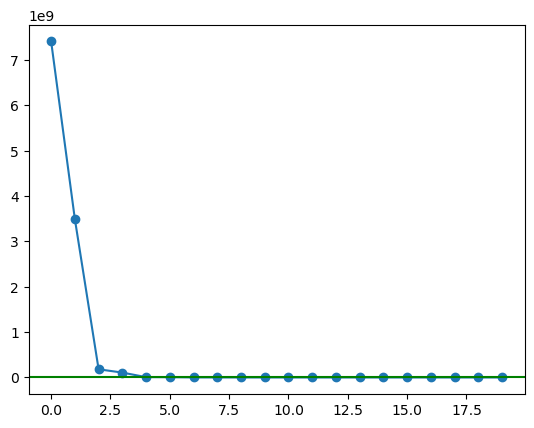

In [14]:
U_misfit, Lambda_misfit = DA.revd(15, 5, mode = "misfit_prior_precond")

plt.scatter(np.arange(Lambda_misfit.shape[0]), np.sort(Lambda_misfit)[::-1])
plt.plot(np.sort(Lambda_misfit)[::-1])

plt.axhline(1, color = "green")

In [15]:
np.sort(Lambda_misfit)[::-1]

array([7.40997002e+09, 3.49064190e+09, 1.80603240e+08, 1.08041911e+08,
       7.82728375e+06, 6.18778490e+06, 1.41171481e+06, 8.03960307e+05,
       6.66322015e+05, 4.33737302e+05, 2.81184693e+05, 2.59144361e+05,
       1.65858060e+05, 1.53508848e+05, 1.39907766e+05, 1.33364434e+05,
       1.31639260e+05, 1.31004070e+05, 1.29404681e+05, 1.28607399e+05])

In [16]:
sigma_B_squared, sigma_P_squared, delta_sigma_qoi_squared = DA.forward_uq_propagation(U_misfit, Lambda_misfit)
sigma_B_squared, sigma_P_squared, delta_sigma_qoi_squared

(2.453708303698882e+29, 2.432963125574413e+29, 0.008454622781850718)

In [17]:
DA = optim.DataAssimilation(sicopolis_dir, simulation,
                            dict_sico_out_folder_prefixes, dict_ad_exec_cmds_suffixes,
                            dict_ad_log_file_suffixes, dict_ad_nc_suffixes,
                            dict_og_params_fields_vals, dict_params_fields_num_dims, 
                            dict_params_coords, dict_params_attrs_type, dict_params_fields_or_scalars, dict_masks_observables, 
                            dict_prior_sigmas, dict_prior_gammas, dict_prior_deltas, 
                            MAX_ITERS_SOR, OMEGA_SOR, None, True, "0002.nc", "/scratch2/shreyas/temp_dir", None, ds_prior_X)

DA.l_bfgs(5, 3)

ValueError: create_ad_nodiff_or_adj_input_nc: Inconsistent keys.